In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




In [48]:
df=pd.read_csv("netflix_titles[1].csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [49]:
df_cleaned=df.copy()

In [50]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [51]:
missing_columns=df.isnull().sum()
missing_columns[missing_columns>0]

director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64

## Data cleansing

### 1. director column

In [52]:
def get_director(row):
    if pd.isnull(row['director']):
        year=row['release_year']
        year_type=row['type']
        data_year=df[df['director'].notnull()]
        data_year=data_year[data_year['release_year'].isin([year+1,year-1,year])]
        data_year1=data_year[(data_year['type']==year_type)]
        
        if pd.notnull(row['country']):
            country=row['country']
            split_country=country.split(',')
            split_country=[x.strip() for x in split_country]
            split_country.append(country.strip())
            split_country=list(set(split_country))
            data_year=data_year1[data_year1['country'].isin(split_country)] 
            if len(data_year)==0:
                data_year=data_year1
                
        data_year=pd.DataFrame(data_year['director'].value_counts())
        data_year.rename(columns = {'director':'count'}, inplace = True)
        data_year.reset_index(inplace=True)
        data_year=(data_year.sort_values(by='count',ascending=False)).head()
        try:
            random_sample=np.random.choice(data_year['index'],1)
            return random_sample[0]
        except:
            random_sample=np.random.choice(df['director'].dropna(),1)
            return random_sample[0]
    else:
        return row['director']
df_cleaned['director']=df_cleaned.apply(get_director,axis=1)

In [53]:
df_cleaned.isnull().sum()['director']

0

### 2. cast

In [54]:
def get_cast(row):
    if pd.isnull(row['cast']):
        year=row['release_year']
        year_type=row['type']
        data_year=df[df['cast'].notnull()]
        data_year=data_year[data_year['release_year'].isin([year+1,year-1,year])]
        data_year1=data_year[(data_year['type']==year_type)]
        
        if pd.notnull(row['country']):
            country=row['country']
            split_country=country.split(',')
            split_country=[x.strip() for x in split_country]
            split_country.append(country.strip())
            split_country=list(set(split_country))
            data_year=data_year1[data_year1['country'].isin(split_country)]
            if len(data_year)==0:
                data_year=data_year1
                
        data_year=pd.DataFrame(data_year['cast'].value_counts())
        data_year.rename(columns = {'cast':'count'}, inplace = True)
        data_year.reset_index(inplace=True)
        data_year=(data_year.sort_values(by='count',ascending=False)).head()             
        try:
            random_sample=np.random.choice(data_year['index'],1) 
            return random_sample[0]
        except:
            random_sample=np.random.choice(df['cast'].dropna(),1)
            return random_sample[0]
    else:
        return row['cast']
df_cleaned['cast']=df_cleaned.apply(get_cast,axis=1)

### 3. date_added

In [55]:
df_cleaned['date_added']= df_cleaned['date_added'].fillna(method="ffill")

In [56]:
df_cleaned.isnull().sum()['date_added']

0

### 4. country

In [57]:
fill_list = df_cleaned['country'].dropna().tolist()
df_cleaned['country'] = df_cleaned['country'].fillna(pd.Series(np.random.choice(fill_list , size = len(df_cleaned.index))))

In [58]:
df_cleaned.isnull().sum()['country']

0

### 5. rating

In [59]:
fill_list = df_cleaned['rating'].dropna().tolist()
df_cleaned['rating'] = df_cleaned['rating'].fillna(pd.Series(np.random.choice(fill_list , size = len(df_cleaned.index))))

In [60]:
df_cleaned.isnull().sum()['rating']

0

### 6. duration

In [61]:
fill_list = df_cleaned['duration'].dropna().tolist()
df_cleaned['duration'] = df_cleaned['duration'].fillna(pd.Series(np.random.choice(fill_list , size = len(df_cleaned.index))))

In [62]:
df_cleaned.isnull().sum()['duration']

0

In [63]:
df_cleaned.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [64]:
df = df_cleaned

In [65]:
df["date_added"] = pd.to_datetime(df["date_added"])

In [66]:
df["Year_added"] = df["date_added"].dt.year
df["Year_added"] = df["Year_added"].fillna(0)
df["Year_added"] = df["Year_added"].astype(int)
df["Month_added"] = df["date_added"].dt.month_name()

<AxesSubplot: ylabel='type'>

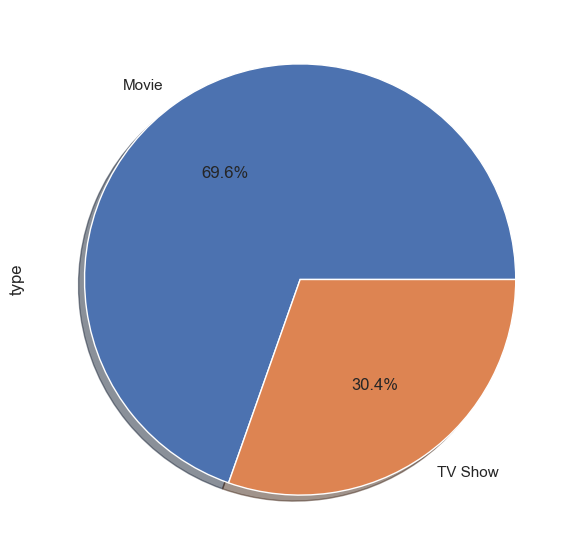

In [67]:
plt.figure(figsize=(14,7))
df["type"].value_counts().plot(kind="pie",shadow=True,autopct = '%1.1f%%')

As we can see netflix has 69 % moveies and 30 % TV shows

C:\Users\amgad\AppData\Local\Temp\ipykernel_10544\2167063992.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df[df["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="darkorange")


Text(0.5, 1.0, 'Frequency of Movies which are released in different years and are there in netflix')

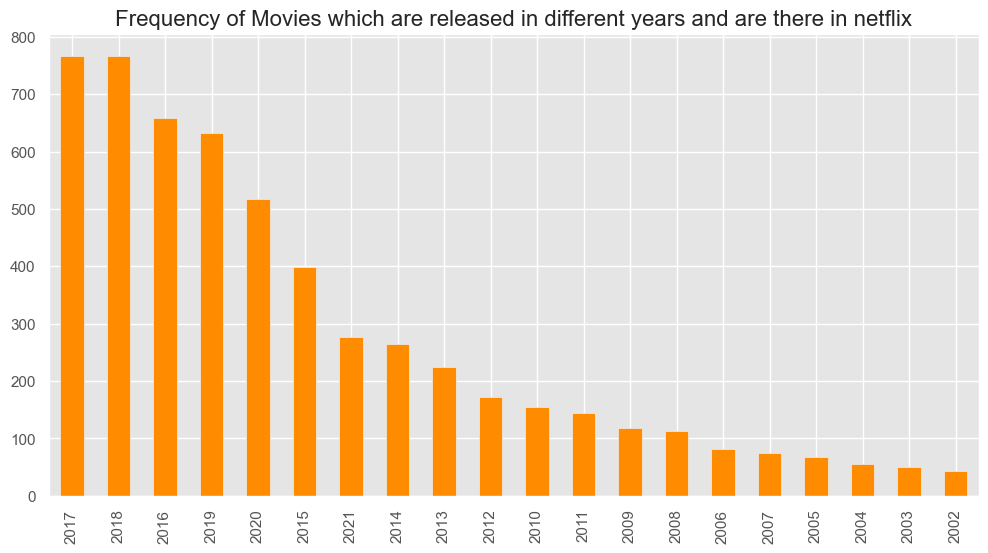

In [68]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="darkorange")
plt.title("Frequency of Movies which are released in different years and are there in netflix",size=16)

C:\Users\amgad\AppData\Local\Temp\ipykernel_10544\2871786195.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df[df["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="mediumblue")


Text(0.5, 1.0, 'Frequency of TV shows which are released in different years and are there in netflix')

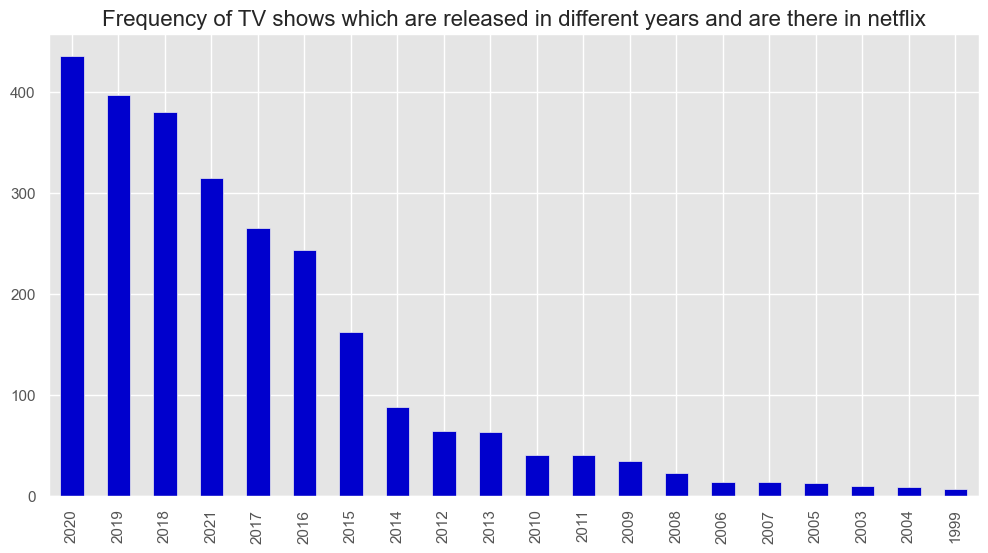

In [69]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="mediumblue")
plt.title("Frequency of TV shows which are released in different years and are there in netflix",size=16)

In [70]:
netflix_shows = (df.loc[df["type"]=="TV Show"]).reset_index(drop=True)
netflix_movies = (df.loc[df["type"]=="Movie"]).reset_index(drop=True)

In [71]:
netflix_shows.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added
0,s2,TV Show,Blood & Water,Bunmi Ajakaiye,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September
1,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September
2,s4,TV Show,Jailbirds New Orleans,Julien Leclercq,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September
3,s5,TV Show,Kota Factory,"Tharun Bhascker Dhaassyam, B. V. Nandini Reddy...","Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September
4,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",India,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,September


In [72]:
netflix_movies.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Channing Tatum, Jason Mantzoukas, Olivia Munn,...",United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United Kingdom,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,September
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,September
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,September


## Movies Vs TV-Shows over the period of time¶


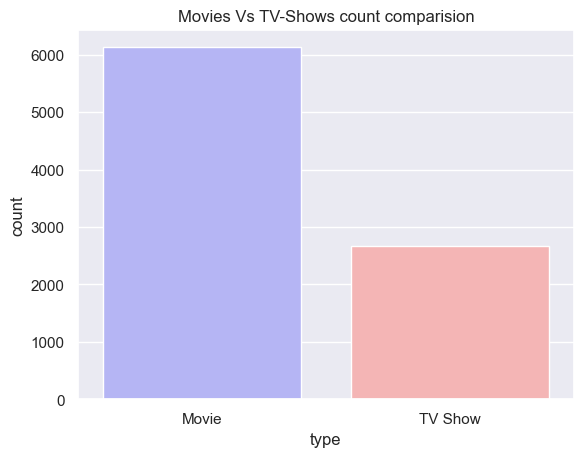

In [73]:
sns.set(style="darkgrid")
sns.countplot(data=df, x=df["type"], palette="bwr")
plt.title("Movies Vs TV-Shows count comparision")
plt.show()

In [74]:
netflix_movies_per_year = netflix_movies.groupby(by="Year_added")["title"].nunique()
netflix_shows_per_year = netflix_shows.groupby(by="Year_added")["title"].nunique()

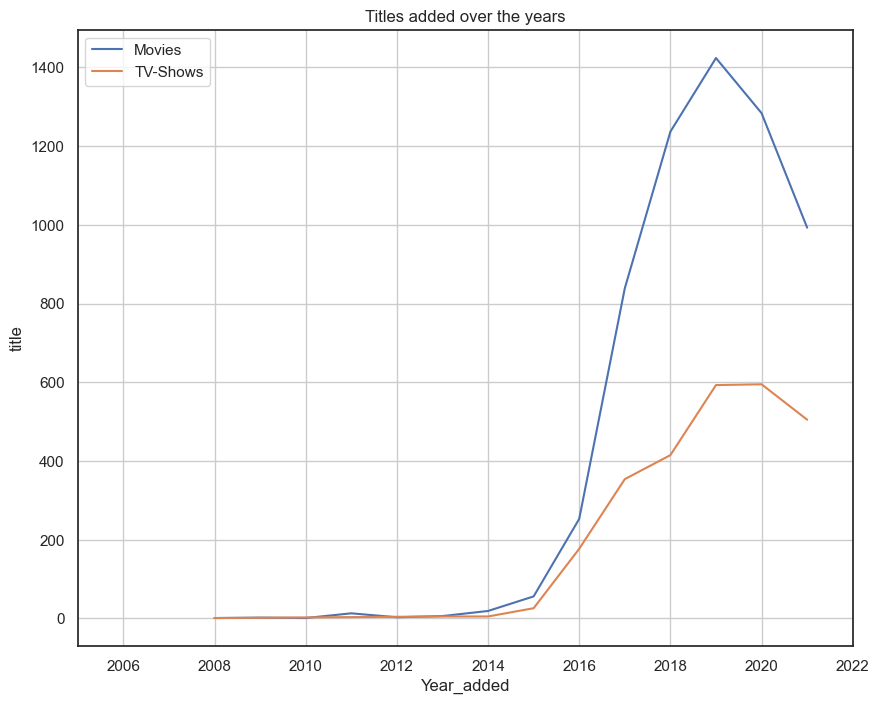

In [75]:
plt.figure(figsize=(10,8))
sns.set(style = "white")
sns.lineplot(data=netflix_movies_per_year, x = netflix_movies_per_year.index, y = netflix_movies_per_year, label="Movies")
sns.lineplot(data=netflix_shows_per_year, x = netflix_shows_per_year.index, y=netflix_shows_per_year, label="TV-Shows")
plt.xlim(2005,2022)
plt.grid()
plt.legend()
plt.title("Titles added over the years")
plt.show()

### Based on the above two graphs, it is evident that more number of movies are added into the content compared to TV-Shows.
So to increase the revenue, more number of TV-Shows can be added to the content.


#### save cleaned dataset

In [79]:

# df.to_csv('cleaned_dataset.csv', index = False, encoding='utf-8') # False: not include index
